In [5]:
import numpy as np
import pandas as pd
from implementations import reg_logistic_regression, ridge_regression
from helpers import get_cross_validation_data, compute_loss_rlr, \
 mse_loss, get_accuracy, build_poly, split_data, mae_loss, data_norm, feature_expansion, remove_outliers
from proj1_helpers import load_csv_data, create_csv_submission, predict_labels
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%load_ext autoreload
%autoreload 2

In [16]:
#load data and split it according to the column named PRI_ject_num
y, X, ids = load_csv_data("data/train.csv") 
kind = X[:,-8]

#get index set of different PRI_ject_num(0, 1, 2&3)
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))

#delete the columns that are meaningless or uncomputable based on specific PRI_ject_num
#collect data sets(specific row groups) according to different PRI_ject_num
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]

X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()
y_zero = y[zero_set]
X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()
y_one = y[one_set]
X_two_three = X[two_three_set,:].squeeze()
y_two_three = y[two_three_set]

In [41]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes = lambda_degree_demo(X_zero, y_zero, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.8323074613421408
lambda:1e-05, degree:2, acc:0.836010609017665
lambda:1e-05, degree:3, acc:0.8379122253915828
lambda:1e-05, degree:4, acc:0.8384626932892959
lambda:1e-05, degree:5, acc:0.8424660961817545
lambda:1e-05, degree:6, acc:0.8435169894410248
lambda:1e-05, degree:7, acc:0.844617925236451
lambda:1e-05, degree:8, acc:0.8448180953810739
lambda:1e-05, degree:9, acc:0.8455687334234099
lambda:1e-05, degree:10, acc:0.8449682229895411
lambda:1e-05, degree:11, acc:0.8341590351799029
lambda:1e-05, degree:12, acc:0.8198969123755192
lambda:1e-05, degree:13, acc:0.8340089075714358
lambda:1e-05, degree:14, acc:0.6510033528499224
lambda:0.00017782794100389227, degree:1, acc:0.8301055897512886
lambda:0.00017782794100389227, degree:2, acc:0.8345593754691488
lambda:0.00017782794100389227, degree:3, acc:0.8368112895961567
lambda:0.00017782794100389227, degree:4, acc:0.8377620977831156
lambda:0.00017782794100389227, degree:5, acc:0.8418655857478857
lambda:0.0001778279

## Experiment of different Lambda and degree
As lambda and degree interactively effect each other, we jointly test them.

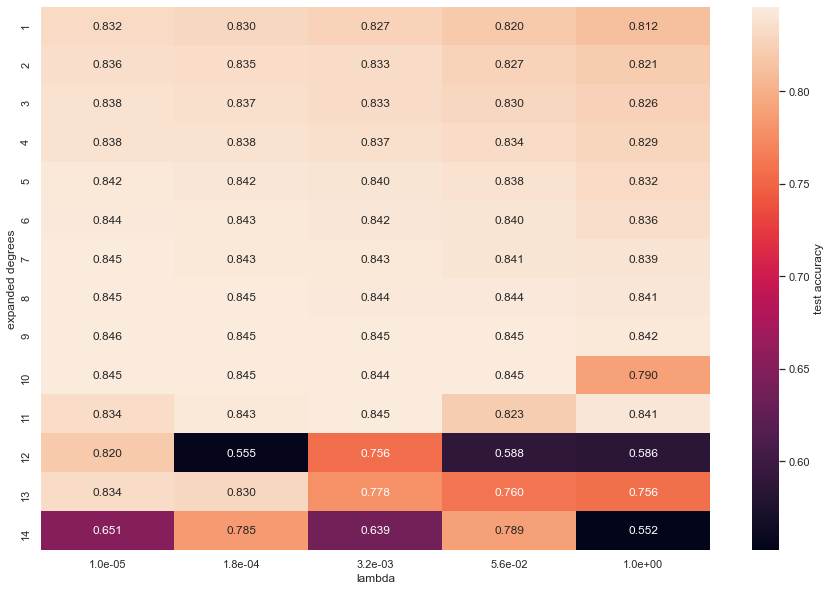

In [53]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='a.png', dpi=100)

In [45]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes_one = lambda_degree_demo(X_one, y_one, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.7665226642594622
lambda:1e-05, degree:2, acc:0.7840608678831646
lambda:1e-05, degree:3, acc:0.7856728351279902
lambda:1e-05, degree:4, acc:0.78502804823006
lambda:1e-05, degree:5, acc:0.7926365336256367
lambda:1e-05, degree:6, acc:0.799148881294732
lambda:1e-05, degree:7, acc:0.7976658714294925
lambda:1e-05, degree:8, acc:0.8002450190212135
lambda:1e-05, degree:9, acc:0.8034044748210717
lambda:1e-05, degree:10, acc:0.8037913469598298
lambda:1e-05, degree:11, acc:0.8050809207556903
lambda:1e-05, degree:12, acc:0.5792765491005223
lambda:1e-05, degree:13, acc:0.4933264556064221
lambda:1e-05, degree:14, acc:0.5866915984267199
lambda:0.00017782794100389227, degree:1, acc:0.7618157199045715
lambda:0.00017782794100389227, degree:2, acc:0.7787736153201367
lambda:0.00017782794100389227, degree:3, acc:0.7788380940099298
lambda:0.00017782794100389227, degree:4, acc:0.7854149203688181
lambda:0.00017782794100389227, degree:5, acc:0.7923786188664647
lambda:0.00017782794

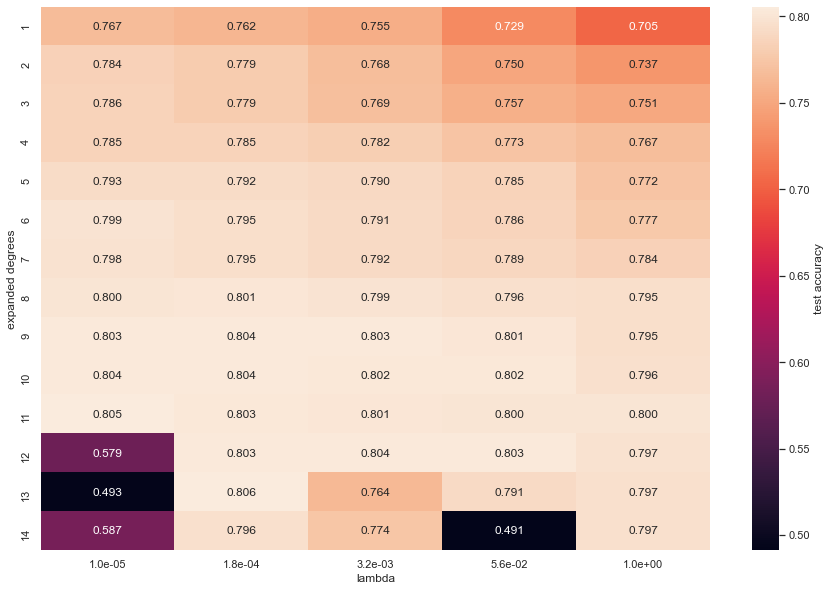

In [52]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes_one.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='b.png', dpi=100)

In [39]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes_two_three = lambda_degree_demo(X_two_three, y_two_three, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.801640361155145
lambda:1e-05, degree:2, acc:0.8068784892135915
lambda:1e-05, degree:3, acc:0.8106692397822042
lambda:1e-05, degree:4, acc:0.8114273898959267
lambda:1e-05, degree:5, acc:0.8161830587910952
lambda:1e-05, degree:6, acc:0.8309325246398787
lambda:1e-05, degree:7, acc:0.835550348059825
lambda:1e-05, degree:8, acc:0.8361017299607141
lambda:1e-05, degree:9, acc:0.8362395754359363
lambda:1e-05, degree:10, acc:0.8377558756633814
lambda:1e-05, degree:11, acc:0.838100489351437
lambda:1e-05, degree:12, acc:0.8369977255496588
lambda:1e-05, degree:13, acc:0.8323799021297126
lambda:1e-05, degree:14, acc:0.5299469294920395
lambda:0.00017782794100389227, degree:1, acc:0.7924047143152526
lambda:0.00017782794100389227, degree:2, acc:0.7982631470121994
lambda:0.00017782794100389227, degree:3, acc:0.8002619064029223
lambda:0.00017782794100389227, degree:4, acc:0.8029498931697567
lambda:0.00017782794100389227, degree:5, acc:0.8144599903508167
lambda:0.00017782794

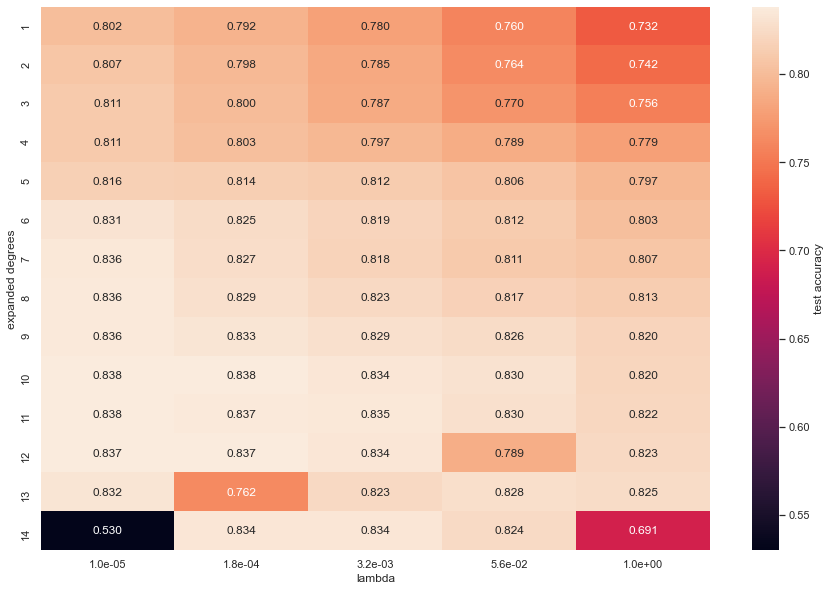

In [51]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes_two_three.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='c.png', dpi=100)

## Experiments on different data preprocessing modes

We tested four kinds of preprocessing modes: Regroup, Regroup + Normalization, Regroup + Normalization + Feature Expansion and Regroup + Feature Expansion. Really cost a lot of time to run this script.

In [6]:
#Regroup data
#load data and split it according to the column named PRI_ject_num
y, X, ids = load_csv_data("./data/train.csv") 

kind = X[:,-8]

#get index set of different PRI_ject_num(0, 1, 2&3)
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))

#delete the columns that are meaningless or uncomputable based on specific PRI_ject_num
#collect data sets(specific row groups) according to different PRI_ject_num
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]

X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()

y_zero = y[zero_set]

X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()

y_one = y[one_set]

X_two_three = X[two_three_set,:].squeeze()

y_two_three = y[two_three_set]

In [9]:
#cross validation
def visualize_cross_validation(degree,seed_,lambda_,y, X, norm = False, feature_expension = False):
    if norm :
        for i in range(0, X.shape[1]):
            mean = np.mean(X[:,i])
            std = np.std(X[:,i])
            X[:,i] = (X[:,i]-mean) / std
    if feature_expension:
        X = feature_expansion(X, degree)
    k_fold = 5
    loss_tr_sum = 0
    loss_te_sum = 0
    corr_sum = 0
    #print("one_hot&delete nan&mse_loss")
    print("k_fold=5")
    print(f'lambda: {lambda_}')
    print(f'degree: {degree}')
    for k in range(k_fold):
        x_tr, x_te, y_tr, y_te = get_cross_validation_data(y, X, k, degree, seed_)
        # gradient descent
        w, loss_tr = ridge_regression(y_tr, x_tr, lambda_)
        y_pred = predict_labels(w, x_te)
        corr = sum(y_pred == y_te)/len(y_pred)
        corr_sum += corr
        loss_te = mse_loss(y_te, x_te, w)
        loss_tr_sum += loss_tr
        loss_te_sum += loss_te
    loss_tr_avg = loss_tr_sum / k_fold
    loss_te_avg = loss_te_sum / k_fold
    corr_avg = corr_sum / k_fold
    print(f'Cross Average model training loss: {loss_tr_avg}')
    print(f'Cross Average model testing loss: {loss_te_avg}')
    print(f'Accuracy: {corr_avg}')
    return corr_avg

In [ ]:
#perform grid search to get data shown in Table 1 
degrees = np.array([1,3])
lambdas = np.logspace(-5, 0, 10)
max_acc = np.zeros((4, 2))
for j, l in enumerate(lambdas):  
    print(j)
    
    print("--------------Only Regroup----------------")
    for i, degree in enumerate(degrees):
        acc0 = visualize_cross_validation(degree, 2021,  l, y_zero, X_zero)
        acc1 = visualize_cross_validation(degree, 2021, l, y_one, X_one)
        acc2_3 = visualize_cross_validation(degree, 2021, l, y_two_three, X_two_three)
        
        #Weighted Average Accuracy
        wa_acc = (acc0*y_zero.shape[0]+ acc1*y_one.shape[0] + acc2_3*y_two_three.shape[0]) / (y_zero.shape[0]+ y_one.shape[0] + y_two_three.shape[0])
        max_acc[0,i] = max(max_acc[0,i],wa_acc)
        print(f'Weighted Average Accuracy: {wa_acc}')
    
    print("--------------Regroup + Normalization----------------")    
    for i, degree in enumerate(degrees):
        acc0 = visualize_cross_validation(degree, 2021, l, y_zero, X_zero, norm = True)
        acc1 = visualize_cross_validation(degree, 2021, l, y_one, X_one, norm = True)
        acc2_3 = visualize_cross_validation(degree, 2021, l, y_two_three, X_two_three, norm = True)
        
        #Weighted Average Accuracy
        wa_acc = (acc0*y_zero.shape[0]+ acc1*y_one.shape[0] + acc2_3*y_two_three.shape[0]) / (y_zero.shape[0]+ y_one.shape[0] + y_two_three.shape[0])
        max_acc[1,i] = max(max_acc[1,i],wa_acc)
        print(f'Weighted Average Accuracy: {wa_acc}')    
    print("--------------Regroup + Normalization + Feature Expansion----------------")   
    for i, degree in enumerate(degrees):
        acc0 = visualize_cross_validation(degree, 2021,  l, y_zero, X_zero, norm = True, feature_expension = True )
        acc1 = visualize_cross_validation(degree, 2021, l, y_one, X_one, norm = True, feature_expension = True)
        acc2_3 = visualize_cross_validation(degree, 2021, l, y_two_three, X_two_three, norm = True, feature_expension = True)
        
        #Weighted Average Accuracy
        wa_acc = (acc0*y_zero.shape[0]+ acc1*y_one.shape[0] + acc2_3*y_two_three.shape[0]) / (y_zero.shape[0]+ y_one.shape[0] + y_two_three.shape[0])
        max_acc[2,i] = max(max_acc[2,i],wa_acc)
        print(f'Weighted Average Accuracy: {wa_acc}')      
    print("--------------Regroup + Feature Expansion----------------")   
    for i, degree in enumerate(degrees):
        acc0 = visualize_cross_validation(degree, 2021,  l, y_zero, X_zero, feature_expension = True )
        acc1 = visualize_cross_validation(degree, 2021, l, y_one, X_one, feature_expension = True)
        acc2_3 = visualize_cross_validation(degree, 2021, l, y_two_three, X_two_three, feature_expension = True)
        
        #Weighted Average Accuracy
        wa_acc = (acc0*y_zero.shape[0]+ acc1*y_one.shape[0] + acc2_3*y_two_three.shape[0]) / (y_zero.shape[0]+ y_one.shape[0] + y_two_three.shape[0])
        max_acc[3,i] = max(max_acc[3,i],wa_acc)
        print(f'Weighted Average Accuracy: {wa_acc}') 
print(max_acc)

## Observation of distribution before and after preprocessing
Experiments for figure 1.

In [11]:
#Read in data
y, X, ids = load_csv_data("./data/train.csv") 
kind = X[:,-8]
y[y==-1]=0

#extract columns name
col_names = open("./data/train.csv", 'r', encoding='utf-8').read().strip().split('\n')[0].split(',')[2:]


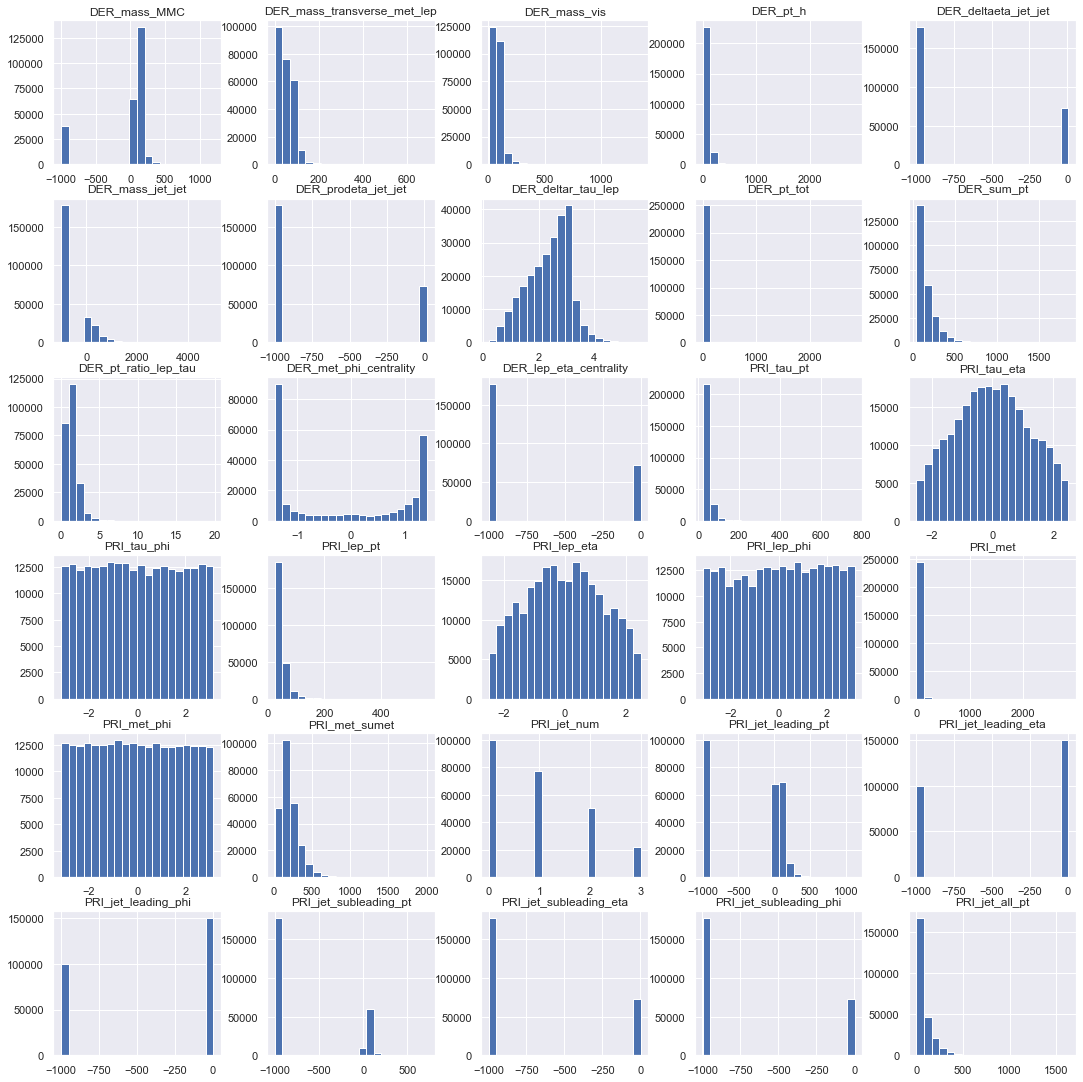

In [12]:
#generate data distribution before preprocessing
fig, ax = plt.subplots(6,5, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
ax = ax.flatten()
for i in range(0, X.shape[1]):b
    plt.subplot(6,5,i+1)
    plt.hist(X[:,i], bins = 20)
    plt.title(col_names[i])
fig.savefig("beforeprocess.jpg")
plt.show()

In [22]:
#get index set of different PRI_ject_num(0, 1, 2&3)
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))

#delete the columns that are meaningless or uncomputable based on specific PRI_ject_num
#collect data sets(specific row groups) according to different PRI_ject_num
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]

X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()
y_zero = y[zero_set]
X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()
y_one = y[one_set]
X_two_three = X[two_three_set,:].squeeze()
y_two_three = y[two_three_set]

In [25]:
# Remove outliers and normalize data
X_zero, y_zero = remove_outliers(X_zero, y_zero)
X_zero = data_norm(X_zero)
X_one, y_one = remove_outliers(X_one, y_one)
X_one = data_norm(X_one)
X_two_three, y_two_three = remove_outliers(X_two_three, y_two_three)
X_two_three = data_norm(X_two_three)

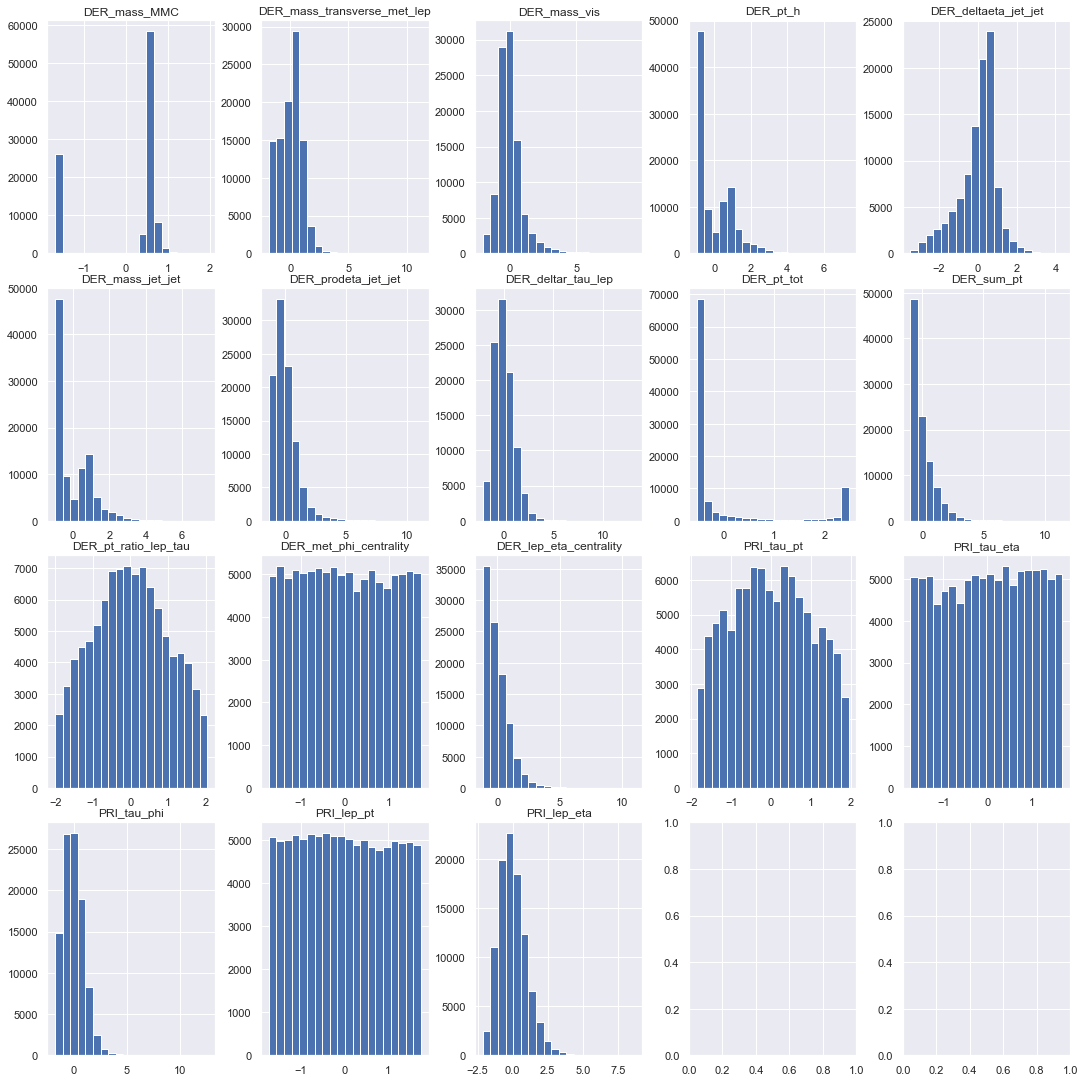

In [26]:
#generate data distribution after preprocessing for group 0(jet_num=0)
row_num = 4
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_zero.shape[1]):
    axes[i//col_num, i%col_num].hist(X_zero[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_zero.jpg")
plt.show()

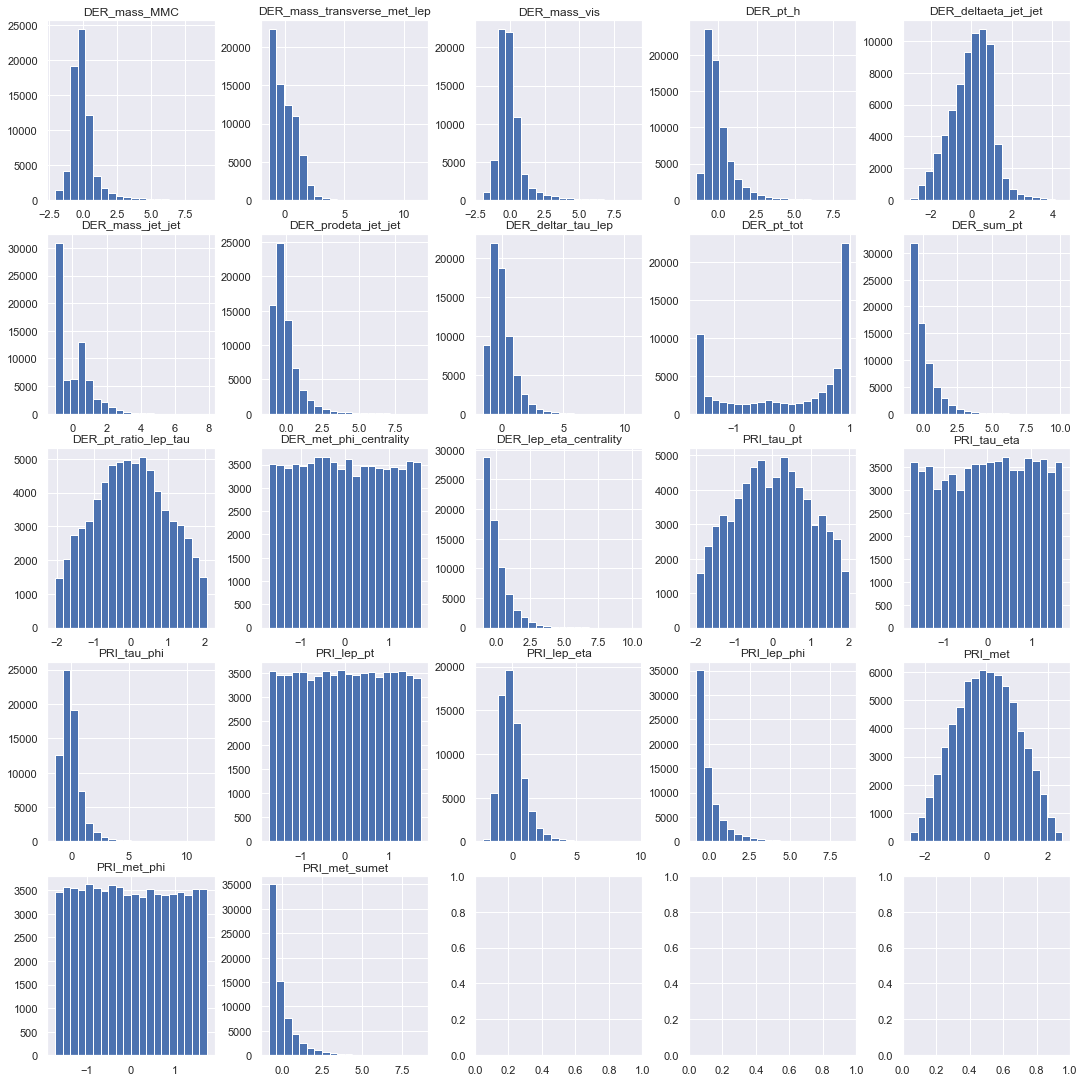

In [27]:
#generate data distribution after preprocessing for group 1(jet_num=1)
row_num = 5
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_one.shape[1]):
    axes[i//col_num, i%col_num].hist(X_one[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_one.jpg")
plt.show()

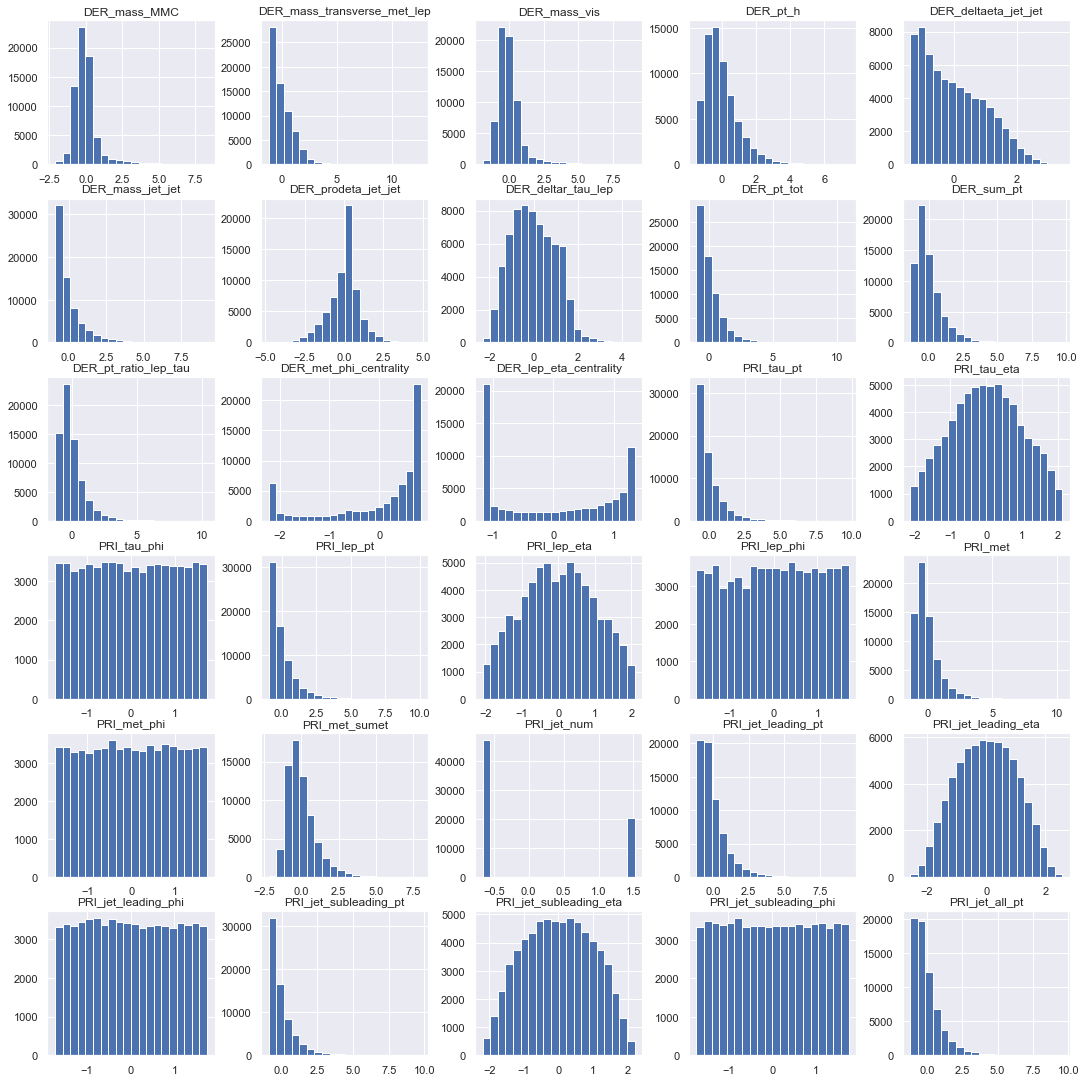

In [28]:
#generate data distribution after preprocessing for group 2_3(jet_num=2 or 3)
row_num = 6
col_num = 5
fig, axes = plt.subplots(row_num, col_num, sharex=False)
fig.set_size_inches(15,15)
fig.tight_layout()
for i in range(0, X_two_three.shape[1]):
    axes[i//col_num, i%col_num].hist(X_two_three[:,i], bins = 20)
    axes[i//col_num, i%col_num].set_title(col_names[i])
fig.savefig("afterprocess_two_three.jpg")
plt.show()

## Preliminary comparison of models 
Least Square GD, Ridge Regression, Logistic Regression and Least Squares
Experiments for table 2

In [ ]:
def normalize(X):
    for i in range(0, X.shape[1]):
        max = np.max(X[:,i])
        min = np.min(X[:,i])
        X[:,i] = (X[:,i]-min) / (max - min)
    return X

In [ ]:
#Least Square GD
from implementations import least_squares_GD
y, X, ids = load_csv_data("./data/train.csv") 
#data regroup and preprocessing
kind = X[:,-8]
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]
X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()
y_zero = y[zero_set]
X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()
y_one = y[one_set]
X_two_three = X[two_three_set,:].squeeze()
y_two_three = y[two_three_set]
# parameters settings
degree = 1
seed = 2021
k_fold = 5
loss_te_sum = []
acc = []
max_iter = 200
gamma = 1e-6
# data nomarlize
X_zero = normalize(X_zero)
X_one = normalize(X_one)
X_two_three = normalize(X_two_three)

# 5-fold cross validation
for k in range(k_fold):
    print(f"fold {k}/{k_fold}")
    x_zero_tr, x_zero_te, y_zero_tr, y_zero_te = get_cross_validation_data(y_zero, X_zero, k, degree, seed, k_fold)
    x_one_tr, x_one_te, y_one_tr, y_one_te = get_cross_validation_data(y_one, X_one, k, degree, seed, k_fold)
    x_two_tr, x_two_te, y_two_tr, y_two_te = get_cross_validation_data(y_two_three, X_two_three, k, degree, seed, k_fold)
    #model 0 
    w0, _ = least_squares_GD(y_zero_tr, x_zero_tr, initial_w= np.zeros((x_zero_tr.shape[1], 1)).squeeze(),
        max_iters = max_iter, gamma= gamma)
    loss_te_0 = mse_loss(y_zero_te, x_zero_te, w0)
    loss_te_sum.append(loss_te_0)
    #model 1
    w1, _ = least_squares_GD(y_one_tr, x_one_tr, initial_w= np.zeros((x_one_tr.shape[1], 1)).squeeze(),
        max_iters = max_iter, gamma= gamma)
    loss_te_1 = mse_loss(y_one_te, x_one_te, w1)
    loss_te_sum.append(loss_te_1)
    #model 2
    w2, _ = least_squares_GD(y_two_tr, x_two_tr, initial_w= np.zeros((x_two_tr.shape[1], 1)).squeeze(),
        max_iters = max_iter, gamma= gamma)
    loss_te_2 = mse_loss(y_two_te, x_two_te, w2)
    loss_te_sum.append(loss_te_2)

    # predict labels
    y_pred0 = np.dot(x_zero_te,w0).squeeze()
    y_pred0[np.where(y_pred0 <= 0)] = -1
    y_pred0[np.where(y_pred0 > 0)] = 1
    y_pred1 = np.dot(x_one_te,w1).squeeze()
    y_pred1[np.where(y_pred1 <= 0)] = -1
    y_pred1[np.where(y_pred1 > 0)] = 1
    y_pred2 = np.dot(x_two_te,w2).squeeze()
    y_pred2[np.where(y_pred2 <= 0)] = -1
    y_pred2[np.where(y_pred2 > 0)] = 1

    acc_tmp = (sum(y_pred0 == y_zero_te) + sum(y_pred1 == y_one_te) + sum(y_pred2 == y_two_te)) / (len(y_pred0) + len(y_pred1) + len(y_pred2))

    acc.append(acc_tmp)

print("acc:{acc}, loss:{loss}".format(acc = sum(acc)/len(acc), loss = sum(loss_te_sum)/len(loss_te_sum)))